<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Grafico_de_S4_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerías

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

##Importando data

In [2]:
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/gfajardo_uNz2xU-2020-2.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

Data = pd.read_csv('/content/gdrive/My Drive/gfajardo_uNz2xU-2020.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

##Transformando columnas de tiempo a formato datetime

In [3]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])

s4.head()

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time
0,20,306,22,3,0.10,300.9,24.6,2020-11-01 00:00:22
1,20,306,22,8,0.05,199.5,47.2,2020-11-01 00:00:22
2,20,306,22,10,0.40,147.1,14.3,2020-11-01 00:00:22
3,20,306,22,11,0.08,210.6,26.2,2020-11-01 00:00:22
4,20,306,22,16,0.04,342.4,42.3,2020-11-01 00:00:22


##Aplicando filtros

In [4]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['S4'])]
s4_clean.set_index('date_time', inplace=True)
#s4_1min=s4_clean.resample("1h").mean()


#Filtros
s4_clean=s4_clean[s4_clean['Elv']>30]

##Generando grupos

In [41]:

#s4["Azint"]=s4["Az"].astype(float)

m=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))
#print(list(m))
print(m.groups.keys())
#print(np.arange(0, 360, 30))




dict_keys([Interval(0, 30, closed='right'), Interval(30, 60, closed='right'), Interval(60, 90, closed='right'), Interval(90, 120, closed='right'), Interval(120, 150, closed='right'), Interval(150, 180, closed='right'), Interval(180, 210, closed='right'), Interval(210, 240, closed='right'), Interval(240, 270, closed='right'), Interval(270, 300, closed='right'), Interval(300, 330, closed='right'), Interval(330, 360, closed='right')])


In [ ]:
s4_1min.head()

,Año,Day,Tiempo,PRN,S4,Az,Elv
date_time,,,,,,,
2020-11-01 00:00:00,20.0,306.0,1793.015385,26.995385,0.093138,216.856154,39.117385
2020-11-01 01:00:00,20.0,306.0,5378.788991,26.229358,0.085535,196.463150,41.862538
2020-11-01 02:00:00,20.0,306.0,8989.314112,24.996965,0.078953,191.290895,43.127466
2020-11-01 03:00:00,20.0,306.0,12618.220472,23.072441,0.087764,168.564567,43.157953
2020-11-01 04:00:00,20.0,306.0,16190.411498,22.686838,0.088865,174.943570,38.067474


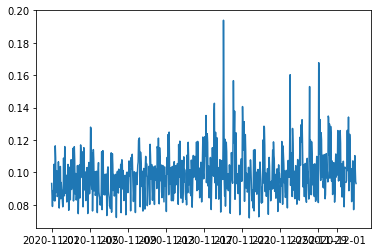

In [ ]:
plt.plot(s4_1min['S4'])

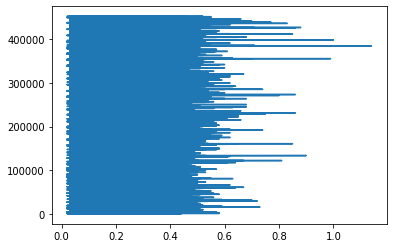

In [ ]:
plt.plot(s4['S4'],s4.index)

In [ ]:
x=s4_1min.index.minute.values
y=s4_1min.S4.values


##Graficando cada arreglo

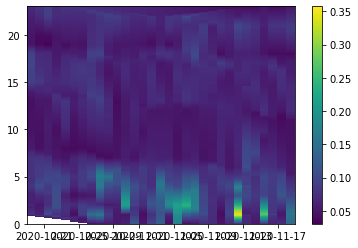

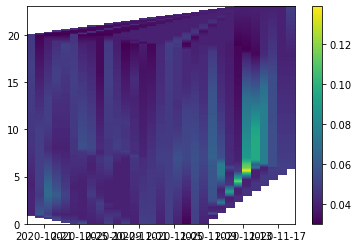

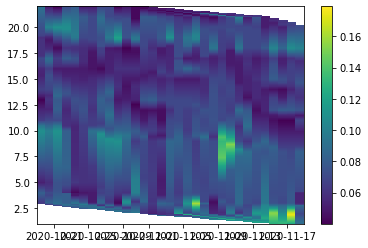

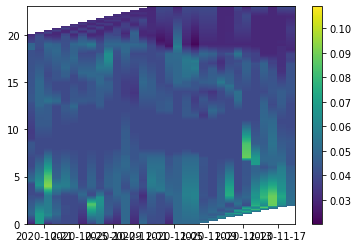

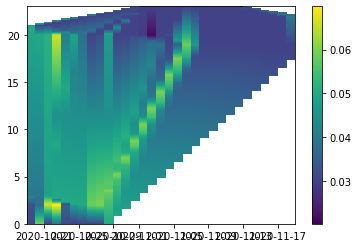

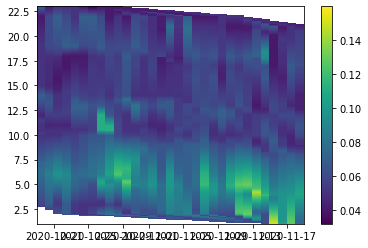

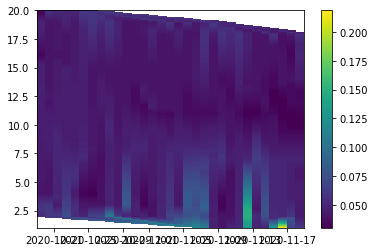

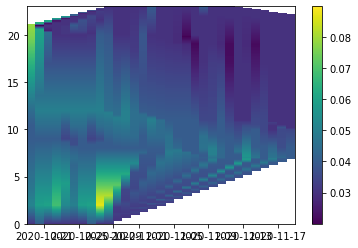

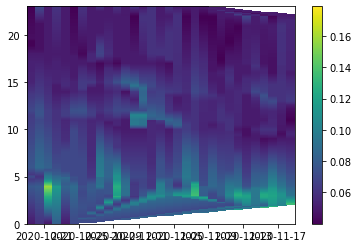

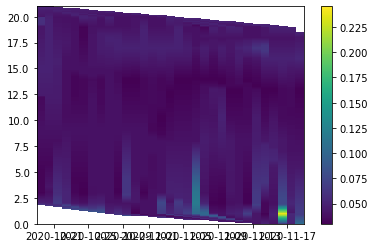

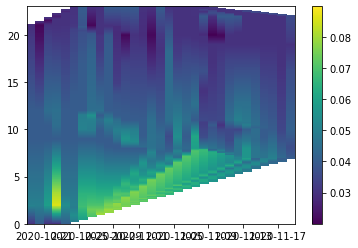

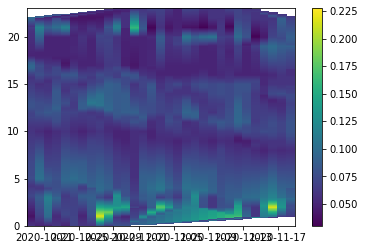

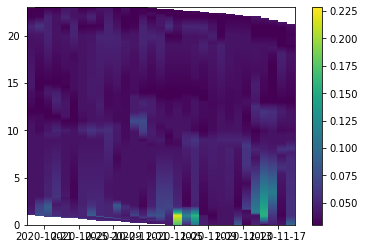

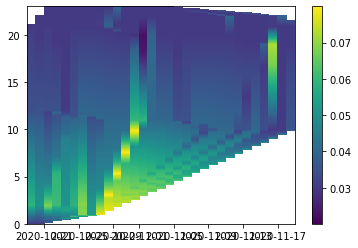

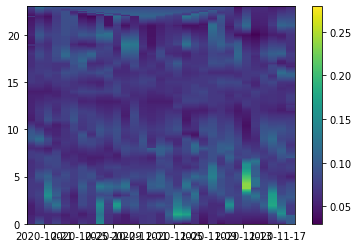

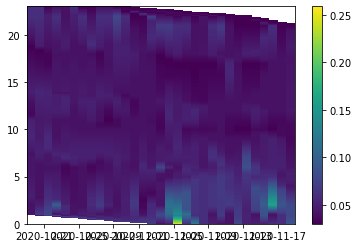

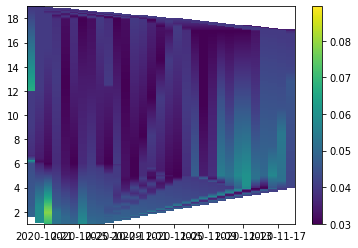

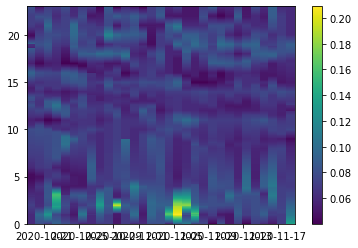

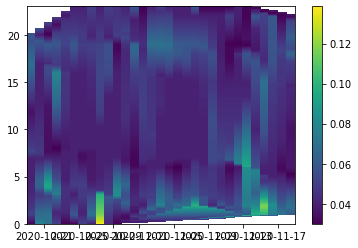

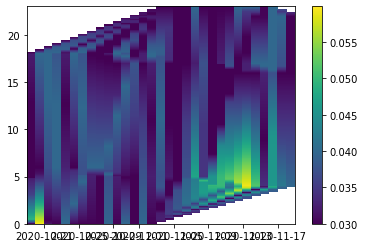

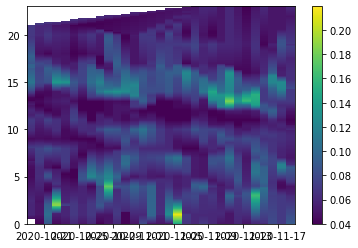

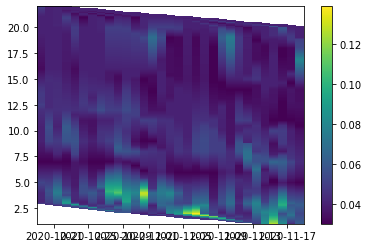

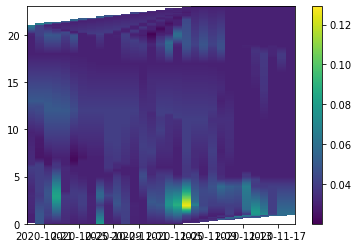

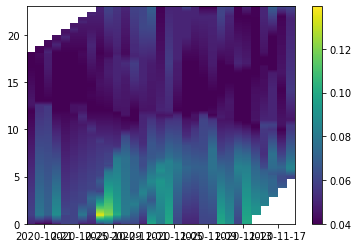

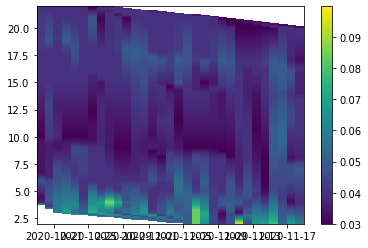

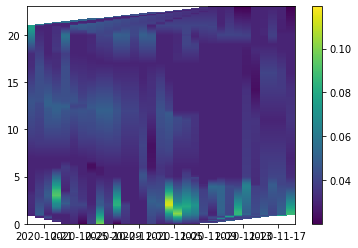

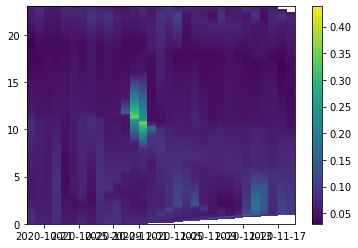

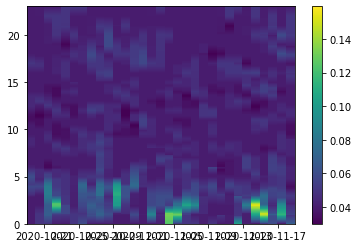

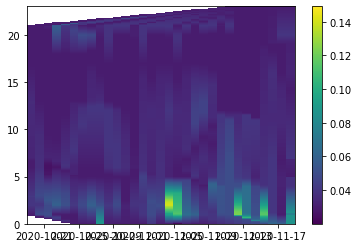

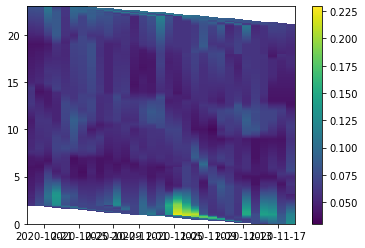

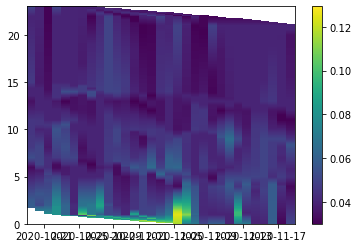

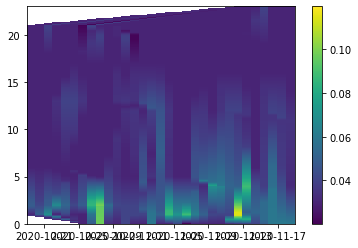

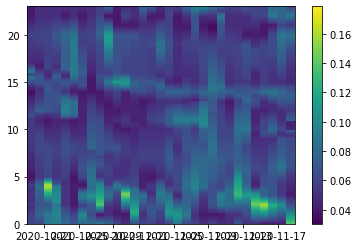

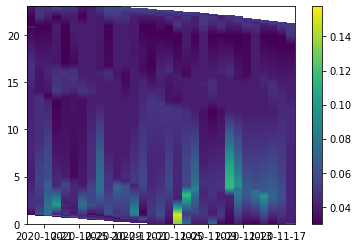

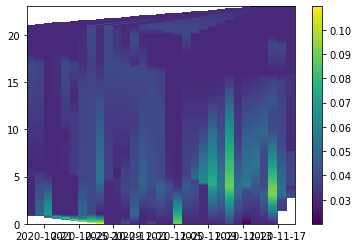

In [48]:
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure


import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure



def plot_S4_hour_day(df,i):
  figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
  xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 50)
  yi = np.linspace(df.index.hour.min(), df.index.hour.max(), 50)
  zi = griddata((df.index.to_julian_date(),df.index.hour),df.S4,(xi[None,:],yi[:,None]),method='linear')
  xij = [jd2jcal(0,v) for v in xi]
  xid = [datetime(x[0],x[1],x[2]) for x in xij]
  plt.contourf(xid,yi,zi)
  plt.title(i)
  cbar=plt.colorbar()
  cbar.ax.set_title('S4', rotation=360)
  plt.show()

def plot_S4_hour_day_2(df,i):
  xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 1000)
  yi = np.linspace(df.index.hour.min(), df.index.hour.max(), 500)
  zi = griddata((df.index.to_julian_date(),df.index.hour),df.S4,(xi[None,:],yi[:,None]),method='linear')
  xij = [jd2jcal(0,v) for v in xi]
  xid = [datetime(x[0],x[1],x[2]) for x in xij]

  fig, ax = plt.subplots()  
  n=ax.pcolormesh(xid, yi, zi)
  fig.colorbar(n)
  plt.show()





n = 366*24
df=s4_clean
#df["z"]=  s4.S4
#df["x"] = s4.index.date
#df["y"] = s4.index.day





for i, d in m:
  n=d.groupby(pd.cut(d["Elv"], np.arange(30, 91, 20)))
  #m=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))

  for i1,d1 in n:
    if len(d1)!=0:
        label='Azimuth interval '+str(i)+'Elv interval '+str(i1)
        plot_S4_hour_day_2(d1,label)


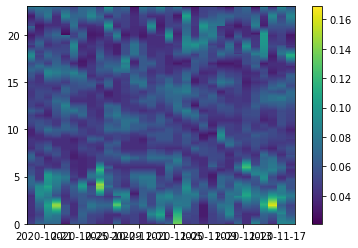

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure



xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 1000)
yi = np.linspace(df.index.hour.min(), df.index.hour.max(), 1000)
zi = griddata((df.index.to_julian_date(),df.index.hour),df.S4,(xi[None,:],yi[:,None]),method='linear')
xij = [jd2jcal(0,v) for v in xi]
xid = [datetime(x[0],x[1],x[2]) for x in xij]

fig, ax = plt.subplots()  
m=ax.pcolormesh(xid, yi, zi)
fig.colorbar(m)


272281


TypeError: ignored

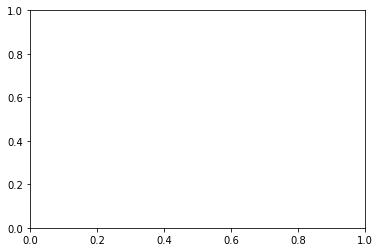

In [6]:
df=s4_clean
x = df.index.to_julian_date()
y = df.index.hour
l = min(len(x), len(y))
print(l)

#for i in range(l):
#    intn_array[i, i] =df.S4[i]


fig, ax = plt.subplots()
ax.pcolormesh(x, y)

In [ ]:
df.S4[0]

NameError: ignored

In [ ]:
df.head

<bound method NDFrame.head of                      Año  Day  Tiempo  PRN    S4     Az   Elv
date_time                                                    
2020-11-01 00:00:22   20  306      22    8  0.05  199.5  47.2
2020-11-01 00:00:22   20  306      22   16  0.04  342.4  42.3
2020-11-01 00:00:22   20  306      22   21  0.07  205.5  30.1
2020-11-01 00:00:22   20  306      22   22  0.06  282.5  40.4
2020-11-01 00:00:22   20  306      22   27  0.03  134.2  71.7
...                  ...  ...     ...  ...   ...    ...   ...
2020-12-02 23:45:40   20  337   85540    8  0.03  348.4  71.6
2020-12-02 23:45:40   20  337   85540   21  0.05  159.0  48.7
2020-12-02 23:45:40   20  337   85540   22  0.08  206.3  42.2
2020-12-02 23:45:40   20  337   85540   27  0.06   22.7  36.8
2020-12-02 23:45:40   20  337   85540  138  0.04  288.3  50.6

[272281 rows x 7 columns]>

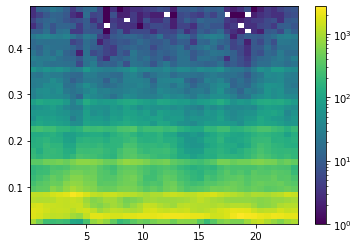

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

s4_2=s4[s4['S4']>0.2]
s4_2=s4[s4['S4']<0.5]
a = s4_2['Tiempo'].apply(lambda x: x/3600+18 if x <= 6 else x/3600)
y,x=s4_2['S4'],s4_2.Tiempo/3600-6

fig, ax = plt.subplots()
h = ax.hist2d(a, y, bins=40, norm=LogNorm())
fig.colorbar(h[3], ax=ax)

(array([[1.317e+03, 5.891e+03, 4.494e+03, 2.067e+03, 1.045e+03, 6.540e+02,
         5.890e+02, 6.030e+02, 2.670e+02, 4.640e+02, 3.900e+02, 3.510e+02,
         2.180e+02, 1.690e+02, 1.260e+02, 1.130e+02, 4.000e+01, 8.200e+01,
         8.900e+01, 7.800e+01, 4.900e+01, 3.600e+01, 2.700e+01, 1.700e+01,
         1.000e+01],
        [4.340e+02, 4.817e+03, 4.241e+03, 2.135e+03, 1.279e+03, 9.310e+02,
         7.590e+02, 6.920e+02, 2.870e+02, 5.750e+02, 4.060e+02, 3.300e+02,
         2.550e+02, 2.000e+02, 1.630e+02, 1.370e+02, 5.600e+01, 8.900e+01,
         7.900e+01, 7.100e+01, 5.900e+01, 6.200e+01, 4.300e+01, 3.800e+01,
         3.100e+01],
        [3.640e+02, 4.265e+03, 4.185e+03, 2.693e+03, 1.633e+03, 1.162e+03,
         8.930e+02, 6.680e+02, 3.060e+02, 5.220e+02, 4.050e+02, 3.040e+02,
         2.450e+02, 1.990e+02, 1.650e+02, 1.480e+02, 7.000e+01, 9.000e+01,
         6.800e+01, 7.700e+01, 5.500e+01, 4.800e+01, 3.500e+01, 3.300e+01,
         2.400e+01],
        [3.110e+02, 4.070e+03, 4.357e

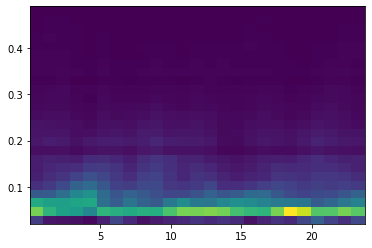

In [ ]:
plt.hist2d(a,y,bins=25)

In [ ]:
plt.hist2d(s4.index.minute.values,s4.S4.values,bins=40)

AttributeError: ignored

In [ ]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt


heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

ValueError: ignored

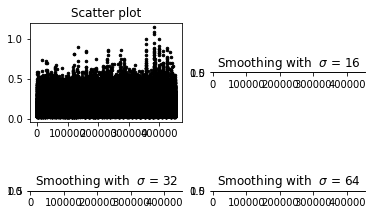

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x = s4.index.values #np.random.randn(1000)
y = s4['S4'].values #np.random.randn(1000)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()